# T2 - cálculo numérico
Fellip Silva Alves - 12543551

In [115]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp

# Questão 1

##Letra A

Para a letra A é necessário criar o método de francis, o qual retorna os autovetores e autovalores de uma matriz A

In [116]:
def francis(A, e=1e-5):
    n, _ = A.shape
    Ak = np.array(A, copy=True)
    V = np.identity(n)

    while np.max(np.abs(Ak - np.diag(Ak.diagonal()))) > e:
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        V = V @ Q

    return Ak.diagonal(), V

##Letra B

Para a letra B foi implementada a função de svd utilizando o método de francis criado na letra anterior.

In [117]:
def dec_SVD(A, e=1e-5):
    # Calcula A^T * A
    ATA = A.T @ A

    # Calcula os autovetores e autovalores de ATA
    eigenvalues, eigenvectors = francis(ATA)

    # Ordena os autovalores em ordem decrescente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calcula a matriz de valores singulares Sigma
    singular_values = np.sqrt(np.abs(eigenvalues))
    Sigma = np.diag(singular_values)

    # Calcula a matriz de autovetores direitos V
    V = eigenvectors

    # Calcula a matriz de autovetores esquerdos U
    U = A @ V / singular_values

    # Retorna U, Sigma e V^T
    return U, Sigma, V.T

##Letra C

Para fazer o teste das funções criadas podemos usar a compressão de uma imagem

In [118]:
def comprimirImagem(U, S, V, k_min, k):
  # k - porcentagem de compressão
  # U S V - matrizes do svd

  #indice de compressão
  kLinha = int(round(k_min * (k/100), 0))

  #imagem comprimida
  imgLinha = U[:, :kLinha] @ (S[:kLinha, :kLinha] @ V[:kLinha, :])
  return imgLinha

In [119]:
def comprimirImagemComparacao(indices = [20, 50]):
  img = mpimg.imread('imagem2.jpg')
  #tratamento da imagem
  img = (0.3*img[:,:,0] + 0.25*img[:,:,1] + 0.45*img[:,:,2]) / 255

  #aplicação do svd
  U, S, V = dec_SVD(img)

  k_min = np.min(img.shape)
  imgs = []
  for indice in indices:
    imgs.append(comprimirImagem(U, S, V, k_min, indice))

  fig, ax = plt.subplots(nrows=1, ncols=len(indices) + 1, dpi=200)
  for i, indice in enumerate(indices):
    ax[i].imshow(imgs[i], cmap="gray")
    ax[i].set_title(f"{indice}%")
    ax[i].axis("off")

    if i == len(indices) - 1:
      ax[i+1].imshow(img, cmap="gray")
      ax[i+1].set_title(f"100%")
      ax[i+1].axis("off")

  plt.plot()

In [120]:
#comprimirImagemComparacao(indices = [5, 10, 30, 50, 70])

# Questão 2

##Letra A

In [121]:
# Aproxima um polinômio usando o método de Lagrange e retorna seu valor nos pontos x
def lagrange(xi, yi, x):
    # Cálculo dos polinômios de Lagrange em cada ponto x
    n = len(xi)
    m = len(x)
    result = np.zeros(m)

    for i in range(n):
        # Constrói o polinômio de Lagrange para o ponto xi[i]
        l_i = np.ones(m)
        for j in range(n):
            if i != j:
                l_i *= (x - xi[j]) / (xi[i] - xi[j])
        result += yi[i] * l_i

    # Retorna os valores do polinômio de Lagrange nos pontos x
    return result

# Aproxima um polinômio usando o método de Newton e retorna seu valor nos pontos x
def newton(xi, yi, x):
    # Cálculo dos coeficientes do polinômio de Newton
    n = len(xi)
    m = len(x)
    a = np.copy(yi)

    for i in range(1, n):
        # Calcula os coeficientes a[i] usando diferenças divididas
        a[i:n] = (a[i:n] - a[i-1]) / (xi[i:n] - xi[i-1])

    # Cálculo dos resultados usando a forma de Newton nos pontos x
    result = np.zeros(m)
    product = np.ones(m)

    for i in range(n):
        # Avalia o polinômio de Newton no ponto x
        result += a[i] * product
        product *= (x - xi[i])

    return result

##Letra B e C

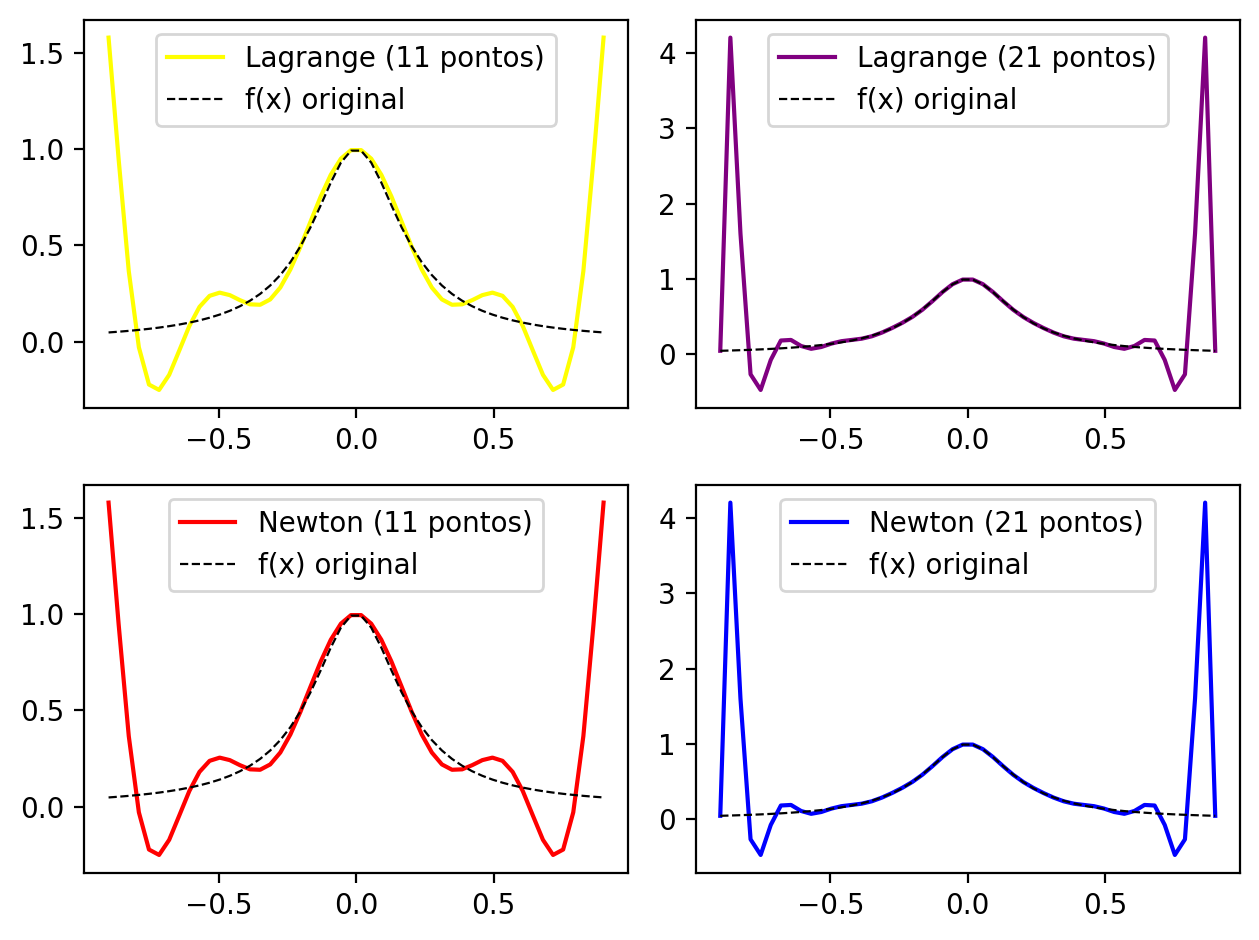

In [122]:
# Função f(x) para interpolação
def f(x):
    return 1 / (1 + 25 * x**2)

# Pontos de interpolação
x_11 = np.linspace(-1, 1, 11)
x_21 = np.linspace(-1, 1, 21)
x_plot = np.linspace(-0.9, 0.9, 50)

# Cálculo das interpolações
y_lagr_11 = lagrange(x_11, f(x_11), x_plot)
y_newt_11 = newton(x_11, f(x_11), x_plot)
y_lagr_21 = lagrange(x_21, f(x_21), x_plot)
y_newt_21 = newton(x_21, f(x_21), x_plot)

# Plot dos gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=200)
ax[0,0].plot(x_plot, y_lagr_11, color='yellow', label='Lagrange (11 pontos)')
ax[0,1].plot(x_plot, y_lagr_21, color='purple', label='Lagrange (21 pontos)')
ax[1,0].plot(x_plot, y_newt_11, color='red', label='Newton (11 pontos)')
ax[1,1].plot(x_plot, y_newt_21, color='blue', label='Newton (21 pontos)')

# Configurações iguais nos plots
for i in range(2):
    for j in range(2):
        ax[i,j].plot(x_plot, f(x_plot), '--', color='black', linewidth=0.8, label='f(x) original')
        ax[i,j].legend()

plt.tight_layout()
plt.show()

Os gráficos das interpolações de Lagrange e Newton, utilizando o mesmo número de pontos nos cálculos, resultam no mesmo polinômio de interpolação. No entanto, ao aumentar o número de pontos, pode surgir o Fenômeno de Runge, um efeito indesejado de oscilações excessivas nas extremidades do intervalo de interpolação. Essas oscilações podem levar a uma aproximação menos precisa nessas regiões. Esse fenômeno ocorre devido à natureza não uniforme da distribuição dos pontos de interpolação e é um desafio comum ao lidar com interpolação de polinômios de alto grau. Para mitigar esse fenômeno, podem ser utilizadas técnicas de interpolação mais avançadas, como interpolação polinomial por partes ou métodos que utilizam funções de base específicas. É importante considerar o Fenômeno de Runge ao escolher o número e a distribuição dos pontos de interpolação, para obter uma aproximação mais precisa e evitar oscilações indesejadas.

##Letra D

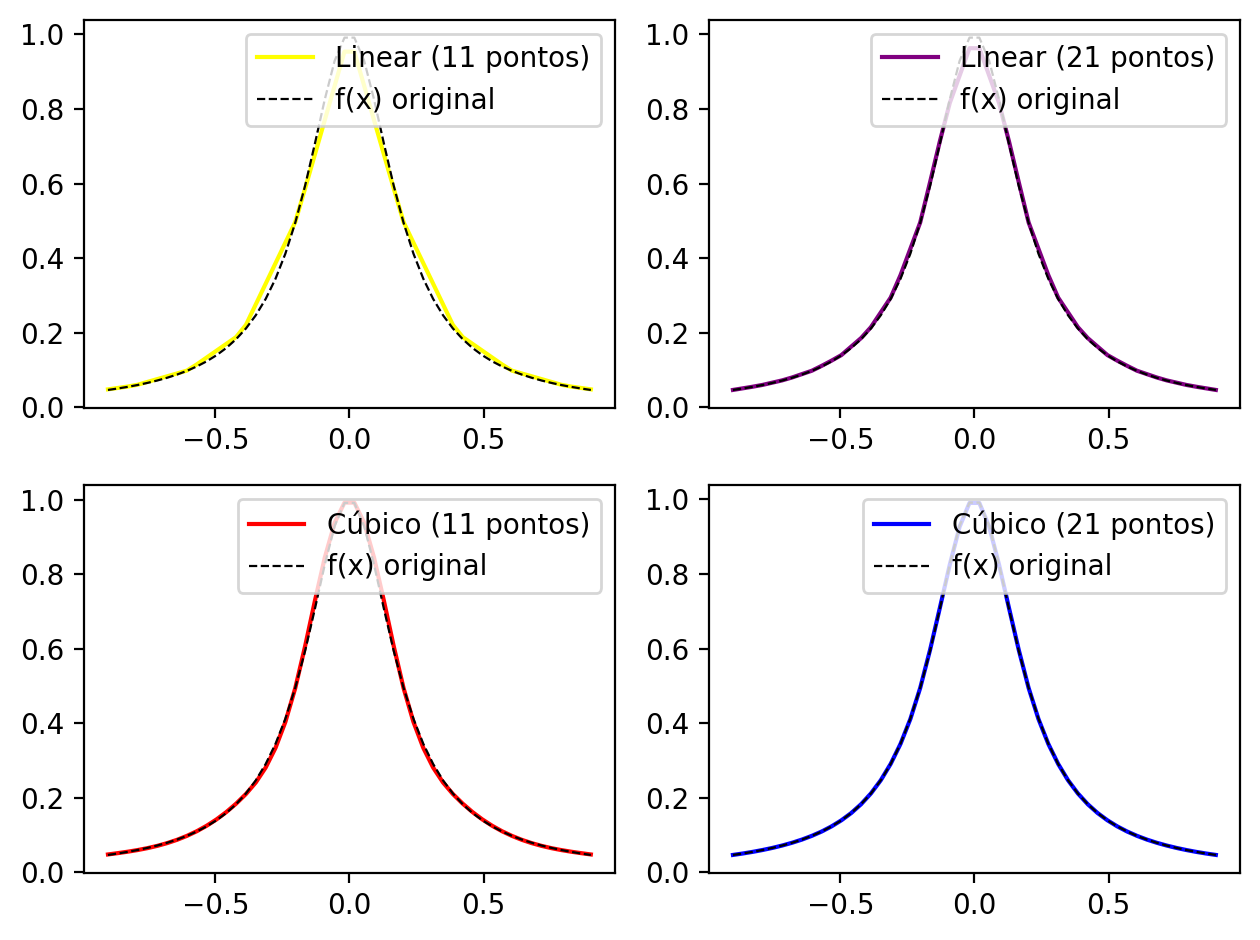

In [123]:
f_linear_11 = sp.interpolate.interp1d(x_11, f(x_11), kind='linear')
f_cubic_11 = sp.interpolate.interp1d(x_11, f(x_11), kind='cubic')
f_linear_21 = sp.interpolate.interp1d(x_21, f(x_21), kind='linear')
f_cubic_21 = sp.interpolate.interp1d(x_21, f(x_21), kind='cubic')

# Plot dos gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=200)
ax[0,0].plot(x_plot, f_linear_11(x_plot), color='yellow', label='Linear (11 pontos)')
ax[0,1].plot(x_plot, f_linear_21(x_plot), color='purple', label='Linear (21 pontos)')
ax[1,0].plot(x_plot, f_cubic_11(x_plot), color='red', label='Cúbico (11 pontos)')
ax[1,1].plot(x_plot, f_cubic_21(x_plot), color='blue', label='Cúbico (21 pontos)')

# Configurações iguais nos plots
for i in range(2):
    for j in range(2):
        ax[i,j].plot(x_plot, f(x_plot), '--', color='black', linewidth=0.8, label='f(x) original')
        ax[i,j].legend()

plt.tight_layout()
plt.show()

É possível notar que utilizando as splines a função ficou mais precisa e mais livre do fenômeno citado anteriormente.

##Letra e

Agora uma outra forma de evitar o fenômeno de Hunge e deixar a interpolação mais precisa é utilizando os nós de chebyshev.

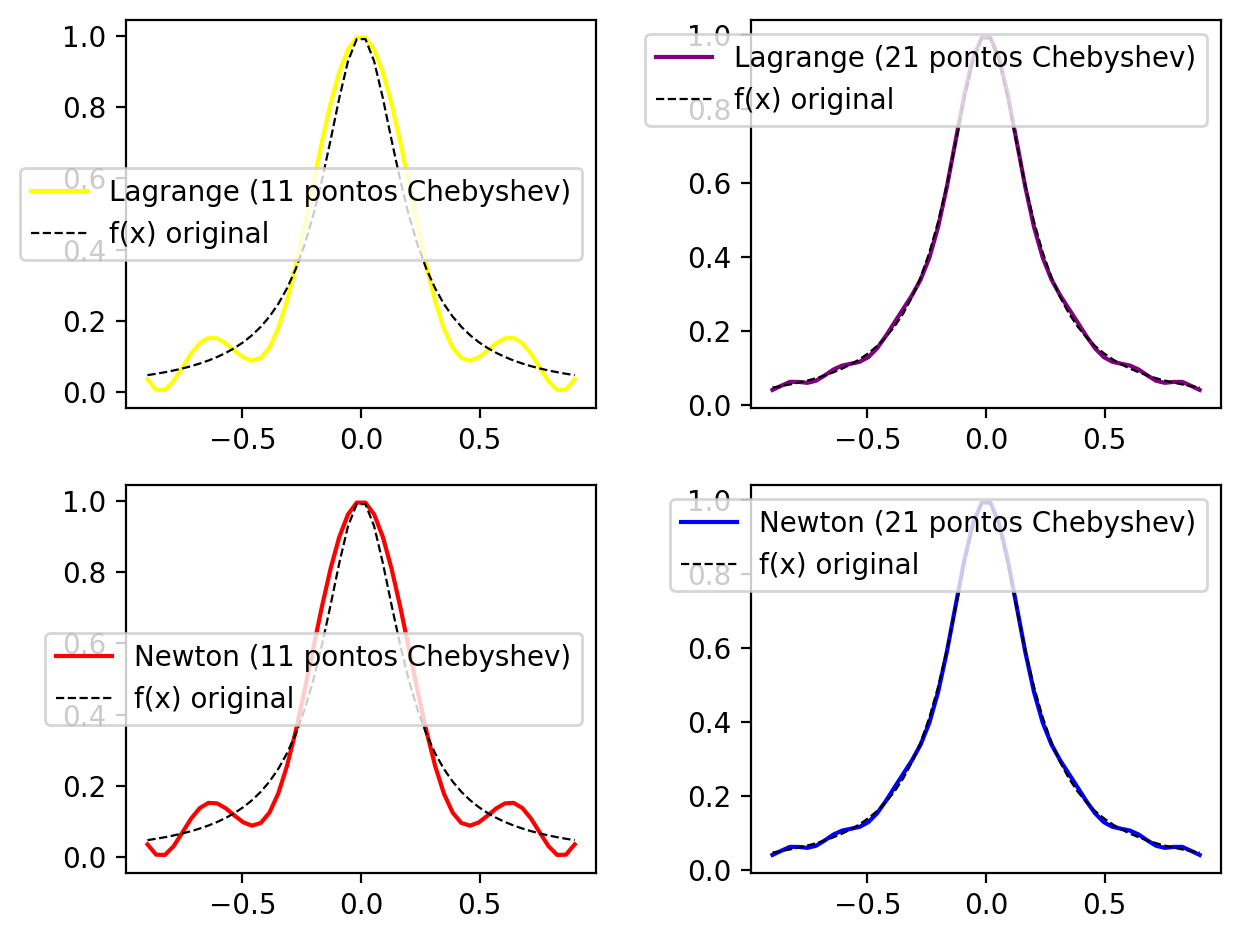

In [124]:
# Função para gerar pontos de Chebyshev
def chebyshev(a, b, n):
    i = np.arange(n)
    return (a + b) / 2 + (a - b) * np.cos((2*i + 1) * np.pi / (2*n)) / 2

# Pontos de Chebyshev
x_chebyshev_11 = chebyshev(-1, 1, 11)
x_chebyshev_21 = chebyshev(-1, 1, 21)

# Cálculo das interpolações de Lagrange e Newton utilizando os pontos de Chebyshev
y_lagr_chebyshev_11 = lagrange(x_chebyshev_11, f(x_chebyshev_11), x_plot)
y_newt_chebyshev_11 = newton(x_chebyshev_11, f(x_chebyshev_11), x_plot)
y_lagr_chebyshev_21 = lagrange(x_chebyshev_21, f(x_chebyshev_21), x_plot)
y_newt_chebyshev_21 = newton(x_chebyshev_21, f(x_chebyshev_21), x_plot)

# Plot dos gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=200)
ax[0, 0].plot(x_plot, y_lagr_chebyshev_11, color='yellow', label='Lagrange (11 pontos Chebyshev)')
ax[0, 1].plot(x_plot, y_lagr_chebyshev_21, color='purple', label='Lagrange (21 pontos Chebyshev)')
ax[1, 0].plot(x_plot, y_newt_chebyshev_11, color='red', label='Newton (11 pontos Chebyshev)')
ax[1, 1].plot(x_plot, y_newt_chebyshev_21, color='blue', label='Newton (21 pontos Chebyshev)')

# Configurações dos gráficos
for i in range(2):
    for j in range(2):
        ax[i, j].plot(x_plot, f(x_plot), '--', color='black', linewidth=0.8, label='f(x) original')
        ax[i, j].legend()

plt.tight_layout()
plt.show()

É notório que utilizando os nós de chebychev a interpolação ficou mais precisa, principalmente a com mais pontos, o qual era o problema anteriormente, aumentar a quantidade de pontos.

# Questão 3

##Letra A

In [125]:
def mmq(x, y, k):
    X = np.vander(x, k)
    A = X.T @ X
    b = X.T @ y

    return np.linalg.solve(A, b)

def mmqQR(x, y, k):
    X = np.vander(x, k)
    Q, R = np.linalg.qr(X)

    b = Q.T @ y

    return np.linalg.solve(R, b)

A função mmq resolve o sistema linear:


$(X.X^T).x = X^T.y$


Dado que X é a **matriz de vandermond**:


\begin{pmatrix}
1 & x_0 & ... & x^n_0 \\
1 & x_1 & ... & x^n_1 \\
... & ... &  & ... \\
1 & x_n & ... & x^n_n
\end{pmatrix}

Conhecido como **forma matricial de uma aproximação**, essa função mmq retorna os coeficientes de um polinômio dado os pontos em um caso discreto.

Já a mmqQR, conhecida como **forma matricial revisitada de uma aproximação**,  resolve o mesmo sistema linear, porém decompondo a matriz X em QR:


$R.a = Q^T.y$

##Letra B

In [126]:
# Abrir o arquivo em modo de leitura
with open('casosacumuladosbrasilatuaizado.txt', 'r') as file:
    # Ler todas as linhas do arquivo e armazená-las em uma lista
    linhas = file.readlines()

# Inicializar um array vazio para armazenar os números
numeros = []

# Iterar sobre cada linha
for linha in linhas:
    # Remover espaços em branco e quebras de linha
    linha_limpa = linha.strip()
    
    # Converter o valor para um número e adicioná-lo ao array
    numeros.append(int(linha_limpa))

# Agora, o array 'numeros' contém todos os valores do arquivo
y = np.array(numeros)
x = np.arange(len(y))


Para utilizar o mmq na função $f(x)=ab^x$ teremos que linearizar ela, e, para isso, podemos utilizar a função $ln$:

$ln[f(x)]=ln(a)+ln(b).x$

In [127]:
# Aplicando o método dos mínimos quadrados
b_, a_ = mmq(x, np.log(y), 2)

# Calculando os coeficientes a e b
a, b = np.exp([a_, b_])

print("a: {}\nb: {}".format(a, b))

a: 35.31304154317277
b: 1.1113520177397236


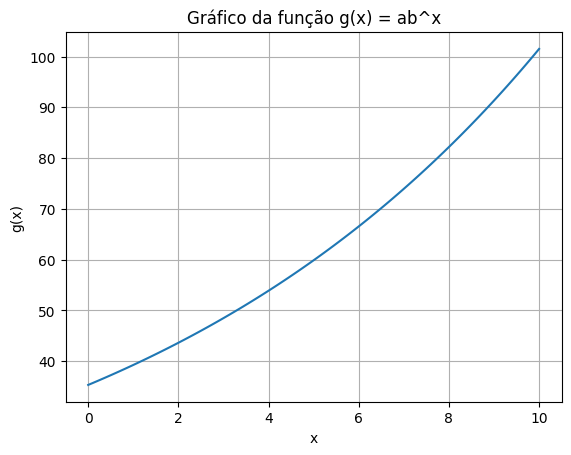

In [128]:
x = np.linspace(0, 10, 100)  # Intervalo de x de 0 a 10 com 100 pontos

# Calcular os valores de y usando a função g(x)
y = a * np.power(b, x)

# Plotar o gráfico
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Gráfico da função g(x) = ab^x')
plt.grid(True)
plt.show()

##Letra C

In [129]:
# Aplicando o método dos mínimos quadrados aos primeiros 20 pontos
b_, a_ = mmq(x[:20], np.log(y[:20]), 2)

# Calculando os coeficientes a e b
a_20, b_20 = np.exp([a_, b_])

print(f"a: {a_20}\nb: {b_20}")

a: 35.313041543172695
b: 1.1113520177397256


##Letra D

In [130]:
# Aplicando o método dos mínimos quadrados aos primeiros 20 pontos
b_, a_ = mmq(x[-50:], np.log(y[-50:]), 2)


# Calculando os coeficientes a e b
a_50, b_50 = np.exp([a_, b_])

print("a: {}\nb: {}".format(a_50, b_50))

a: 35.313041543172424
b: 1.1113520177397251


##Letra E

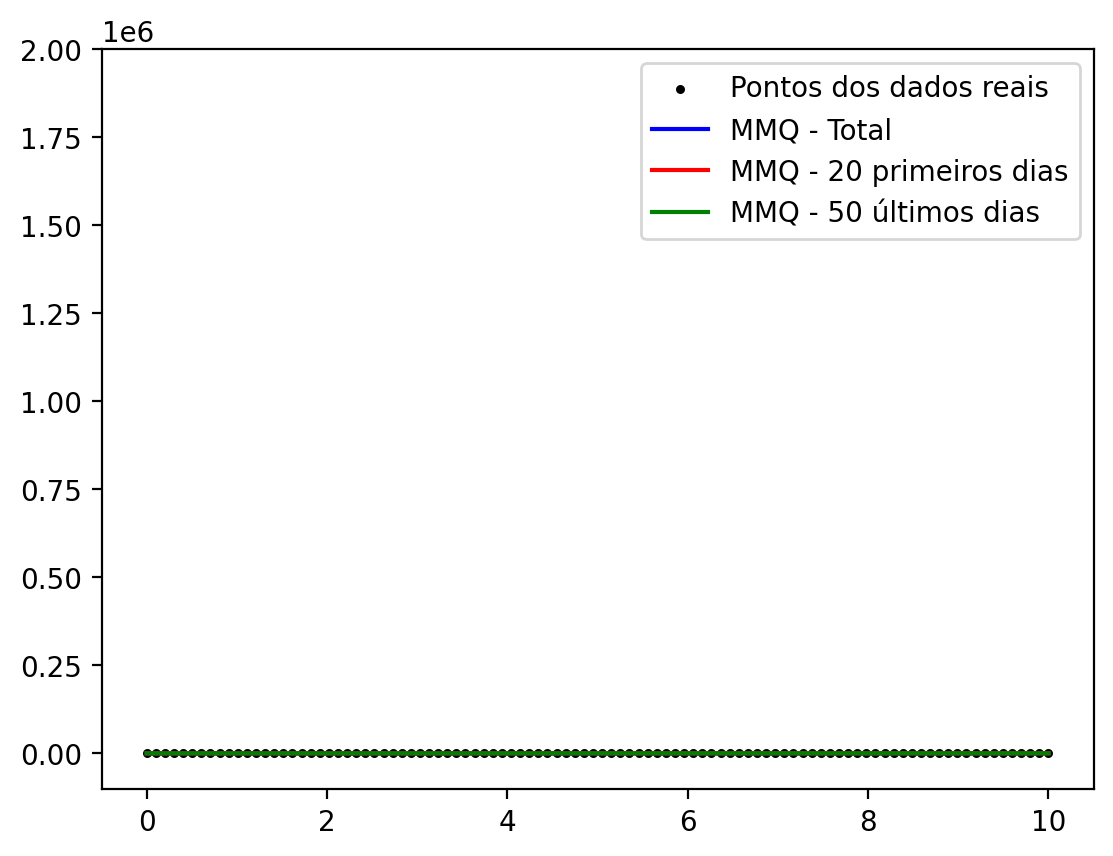

In [131]:
# Definindo as funções para as curvas
f1 = lambda x: a * b**x
f2 = lambda x: a_20 * b_20**x
f3 = lambda x: a_50 * b_50**x

# Plot dos gráficos
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=200)

# Plot dos pontos dos dados reais
plt.scatter(x, y, s=5, color='black', label='Pontos dos dados reais')

# Plot da curva do método dos mínimos quadrados para todos os dados
plt.plot(x, f1(x), color='blue', label='MMQ - Total')

# Plot da curva do método dos mínimos quadrados para os primeiros 20 dias
plt.plot(x, f2(x), color='red', label='MMQ - 20 primeiros dias')

# Plot da curva do método dos mínimos quadrados para os últimos 50 dias
plt.plot(x, f3(x), color='green', label='MMQ - 50 últimos dias')

# Configurações do gráfico
plt.legend()
plt.ylim([-1e5, 2e6])
plt.show()

Com a análise desse gráfico é possível notar que quando se olha apenas o começo dos dados, como os 20 primeiros, o coef b se torna muito alto e o a baixo, fazendo com que o gráfico tenha um crescimento muito elevado, que é a linha verde. Quando olha apenas os útlimos pontos, o coef b se torna menor, não deixando o gráfico explodir, mas, em contrapartida, o coef a se torna muito alto, o qual é representado pela linha vermelha.